In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import math

In [26]:
df=pd.read_csv(r'C:\Users\ASUS\Downloads\datasets_1790_3098_nba_2016_2017_100.csv', sep=",")
df

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,...,1,293,5,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.6,1,4.500
1,1626246,Boban Marjanovic,1610612765,DET,28,35,16,19,0.457,8.4,...,356,47,5,"16,262,461,610,612,700",Boban_Marjanovi_,0,7.00,5.5,0,0.000
2,1627743,Demetrius Jackson,1610612738,BOS,22,5,1,4,0.200,3.4,...,480,3,5,"16,277,431,610,612,700",Demetrius_Jackson,d_jay11,1.45,2.0,1,0.049
3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,...,3,95,5,"2,030,761,610,612,740",Anthony_Davis_(basketball),antdavis23,22.12,28.0,1,1.220
4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,...,9,253,5,"2,019,351,610,612,740",James_Harden,jharden13,26.50,29.1,1,4.470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,203080,Thomas Robinson,1610612747,LAL,26,48,15,33,0.313,11.7,...,337,56,5,"2,030,801,610,612,740",Thomas_Robinson_(basketball),trobinson0,1.05,5.0,1,0.126
96,202699,Tobias Harris,1610612765,DET,24,82,37,45,0.451,31.3,...,57,129,5,"2,026,991,610,612,760",Tobias_Harris,tobias31,16.00,16.0,1,0.022
97,203944,Julius Randle,1610612747,LAL,22,74,24,50,0.324,28.8,...,98,118,5,"2,039,441,610,612,740",Julius_Randle,j30_randle,3.28,13.2,1,0.358
98,1627767,Cheick Diallo,1610612740,NOP,20,17,9,8,0.529,11.7,...,314,146,5,"16,277,671,610,612,700",Cheick_Diallo,cheick_diallo13,1.31,5.1,1,0.015


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 63 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PLAYER_ID                        100 non-null    int64  
 1   PLAYER_NAME                      100 non-null    object 
 2   TEAM_ID                          100 non-null    int64  
 3   TEAM_ABBREVIATION                100 non-null    object 
 4   AGE                              100 non-null    int64  
 5   GP                               100 non-null    int64  
 6   W                                100 non-null    int64  
 7   L                                100 non-null    int64  
 8   W_PCT                            100 non-null    float64
 9   MIN                              100 non-null    float64
 10  OFF_RATING                       100 non-null    float64
 11  DEF_RATING                       100 non-null    float64
 12  NET_RATING             

In [28]:
# Sorted by salary in descending order
df_sorted = df.sort_values(by='SALARY_MILLIONS', ascending=False)
df_sorted.head(5)

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
6,2544,LeBron James,1610612739,CLE,32,74,51,23,0.689,37.8,...,15,45,5,"25,441,610,612,739",LeBron_James,KingJames,30.96,26.4,1,37.000
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,...,1,293,5,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.6,1,4.500
18,201144,Mike Conley,1610612763,MEM,29,69,35,34,0.507,33.2,...,40,181,5,"2,011,441,610,612,760",Mike_Conley_Jr.,mconley11,26.54,20.5,1,0.342
63,201143,Al Horford,1610612738,BOS,31,68,46,22,0.676,32.3,...,70,149,5,"2,011,431,610,612,730",Al_Horford,al_horford,26.54,14.0,1,0.253
5,201142,Kevin Durant,1610612744,GSW,28,62,51,11,0.823,33.4,...,22,53,5,"2,011,421,610,612,740",Kevin_Durant,KDTrey5,26.54,25.1,1,16.200


In [29]:
# Sorted by salary in ascending order
df_sorted = df.sort_values(by='SALARY_MILLIONS', ascending=True)
df_sorted.head(5)

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
90,201563,Michael Beasley,1610612749,MIL,28,56,23,33,0.411,16.7,...,181,62,5,"2,015,631,610,612,740",Michael_Beasley,easyst0,0.31,9.4,1,0.064
55,1627848,Shawn Long,1610612755,PHI,24,18,5,13,0.278,13.0,...,229,36,5,"16,278,481,610,612,700",Shawn_Long,shawnlong21,0.54,8.2,1,0.002
22,1627762,Joel Bolomboy,1610612762,UTA,23,12,8,4,0.667,4.4,...,467,34,5,"16,277,621,610,612,700",Joel_Bolomboy,bolomboy21,0.60,1.8,1,0.009
59,203462,Archie Goodwin,1610612751,BKN,22,15,8,7,0.533,14.3,...,317,47,5,"2,034,621,610,612,750",Archie_Goodwin_(basketball),a1laflare10,0.94,7.9,1,0.101
57,1626210,Alan Williams,1610612756,PHX,24,47,11,36,0.234,15.1,...,247,79,5,"16,262,101,610,612,700",Alan_Williams_(basketball),alantwilliams,0.96,7.4,1,0.008


In [30]:
print('Mean salary is %.3f' % df['SALARY_MILLIONS'].mean())
print('Standard deviation of the salary is %.3f' % df['SALARY_MILLIONS'].std())

Mean salary is 11.290
Standard deviation of the salary is 8.789


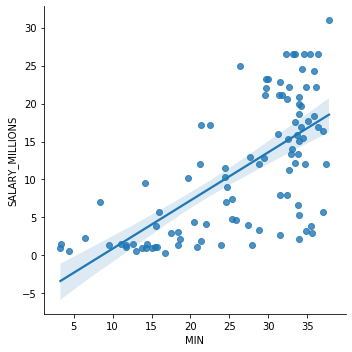

In [31]:
sns.lmplot(x="MIN", y="SALARY_MILLIONS", data=df)
plt.show()

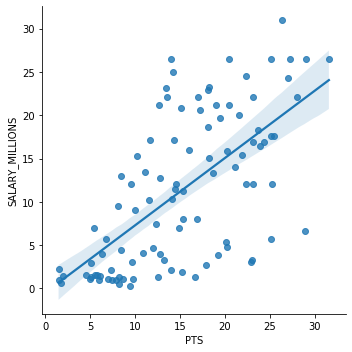

In [60]:
sns.lmplot(x="PTS", y="SALARY_MILLIONS", data=df)
plt.show()

In [65]:
X = df[['PTS']]
Y = df['SALARY_MILLIONS']

# Build linear regression model
lr_model = LinearRegression(fit_intercept=True, normalize=False)
lr_model.fit(X, Y)
sc = lr_model.score(X, Y)
print('R2 score: %.3f' % sc)

R2 score: 0.419


In [61]:
X = df[['W_PCT', 'ACTIVE_TWITTER_LAST_YEAR', 'TWITTER_FOLLOWER_COUNT_MILLIONS', 'MIN', 
                'PTS', 'DREB_PCT', 'OREB_PCT', 'AGE']]
Y = df['SALARY_MILLIONS']


In [62]:
# Separate train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [63]:
lr_model = LinearRegression(fit_intercept=True, normalize=True)
lr_model.fit(X_train, y_train)
sc = lr_model.score(X_train, y_train)
print('R2 score: %.3f' % sc)

R2 score: 0.605


In [58]:
# Make predictions over train set
y_pred = lr_model.predict(X_train)
rmse = math.sqrt(mean_squared_error(y_train, y_pred))
print('RMSE is %.3f. Data STD is %.3f' % (rmse, Y.std()))

RMSE is 5.402. Data STD is 8.789


In [59]:
print(lr_model.coef_)

[-4.09552813 -2.10589093  0.40118939  0.31786191  0.36943713 17.64870862
 -7.52858272  0.63753606]


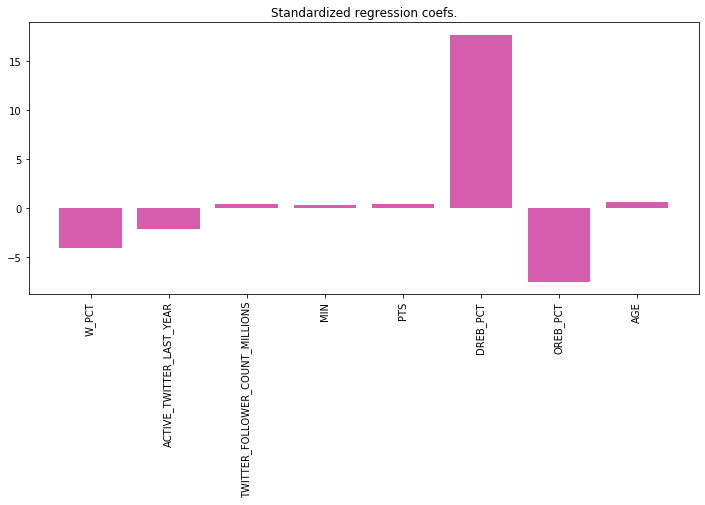

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.bar(X.columns, lr_model.coef_, color=(0.8, 0.2, 0.6, 0.8))
plt.xticks(rotation=90)
plt.title('Standardized regression coefs.')
plt.show()

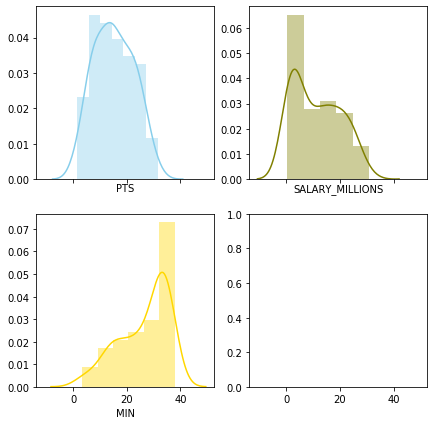

In [70]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( df["PTS"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["SALARY_MILLIONS"] , color="olive", ax=axes[0, 1])
sns.distplot( df["MIN"] , color="gold", ax=axes[1, 0])